# Univariate Linear Regression

In this iPython notebook, I'm going to create an Univariate Linear Regression model without using any scikit-learn or other libraries. The objective is to understand better what these libraries actually does under the hood and get a better intuition into how we can actually make these algorithms perform better. Before we begin, I'd like to take a moment and introduce a few notations that we're going to use throughout this notebook.

**Notations:**
- $m$ = Numner of Training Examples
- $X$ = Input Variables
- $y$ = Output Variables
- $(x^{(i)},y^{(i)})$ = $i^{th}$ Training Example

Now let's get started and I'll explain the rest on the way as we proceed with this notebook

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The above libraries are some bare minimum which I had to import to make this notebook somewhat concise and not ending up covering a lot of stuff which might turn out to be irrelevant for the purpose of this notebook. Also, these libraries are proven to be fast and I would not have to worry too much on things like writing a function for matrix multiplication which might turn out to have a huge time complexity.

In [2]:
# Okay, enough talk nor now, let's start by importing our dataset
# (This dataset is from one of the Octave excercises from Andrew Ng's tutorial on Machine Learning)
data = pd.read_csv("./data.txt", sep=",", names=["Population in 10k", "Profit in $10k"])

In [3]:
# Taking a look at the imported data
data.head(5)

,Population in 10k,Profit in $10k
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Splitting columns from our dataset
X = data['Population in 10k']
y = data['Profit in $10k']

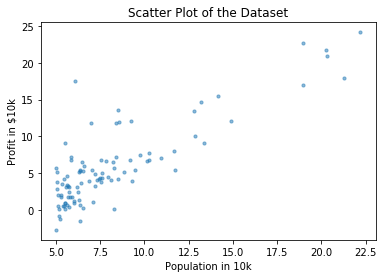

In [5]:
# Now I wanna plot and see how the dataset looks like
# I'm reducing the marker size a bit, so that the individual points close by don't overlap each other
plt.scatter(X, y, s=10, alpha=0.5)
plt.title('Scatter Plot of the Dataset')
plt.xlabel('Population in 10k')
plt.ylabel('Profit in $10k')
plt.show()

In [6]:
# Now I want to convert 'X' into a single column numpy array
X = np.array(X)
X.shape

(97,)

Few more notations I'm using here:
- $R$ = Number of Rows
- $C$ = Number of Columns

As you can see above, the shape turned out to be a vector instead of a RxC matrix or 2D array. If you're not familiar with numpy, or new to numpy array indexing, let me try to elaborate a bit.

##### Shape: (R,)
Here the array is basically single indexed. For example, consider the following example of an array of 8 numbers:

| Data  | 9 | 1 | 5 | 3 | 7 | 3 | 2 | 5 |
| ----- | - | - | - | - | - | - | - | - |
| Index | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |

##### Shape: (R,C)
We want to have a 2D indexing in our array which will basically be a single column matrix (a number of rows with only one column):

| Data      | 9 | 1 | 5 | 3 | 7 | 3 | 2 | 5 |
| --------- | - | - | - | - | - | - | - | - |
| Index (i) | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| Index (j) | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |

**TL;DR:** `array.shape` basically returns the number of rows (R) vs the number of columns (R) in the array/matrix

In [7]:
# Reshaping our numpy array
m = y.size
X = X.reshape(m,1)
X.shape

(97, 1)

### Hypothesis
Before we proceed further, it's important to understand what hypothesis is. It is a straight line fit through our dataset, which tries to map the input features (X) to output variables (y).

\begin{align}
h_\theta(x) = \theta _0 + \theta _1 x
\end{align}

**Notations:**
- $h$ = Hypothesis
- $\theta_0$ & $\theta_1$ = Parameters

> A good hypothesis fits the evidence and can be used to make predictions about new observations or new situations.

In [8]:
# Now I want to add a column of 1's to the 0th index of 'X' (Explanation Below)
# Also shift the existing data in the 0th index to the 1st index
X = np.append(np.ones((m, 1), dtype=int), X, axis=1)
X.shape

(97, 2)

I did the above to take into account the intercept term $\theta_0$. I added an extra column of 1's to the matrix 'X', so that I can treat $\theta_0$ as another feature. For this, I needed to place the new column in the 0th column index and shift the existing column of data from 0th to 1st index. Now the shape of the matrix will be (R,2).

In [9]:
# Let's initialize Theta as a 2x1 null array
theta = np.zeros((2,1), dtype=float)
theta.shape

(2, 1)

### Cost Function & Gradient Descent
Gradient Descent attempts to find the local or global optima of a function. We succeed in training a model when the Cost Function reaches the global optimum.

\begin{align}
J(\theta_0, \theta_1) = \frac{1}{2m} \sum^m_{i=1} (h_\theta(x^{(i)})-y^{(i)})^2
\end{align}

> A model learns by minimizing the Cost Function using Gradient Descent

**Algorithm:**  
{
$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta_0, \theta_1)
$$
}

Simultaneously update $\theta_1$ and $\theta_2$,  
$temp0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$  
$temp1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$  
$\theta_0 := temp0$  
$\theta_1 := temp1$

**Notation:**
- $\alpha$ = Learning Rate

In [10]:
# Function for Computing Cost Function
def costFunction(theta):
    J_sum = 0
    for i in range(m):
        J_sum += ((theta[0] + theta[1] * X[i][1]) - y[i])**2
    J = (1/(2*m)) * J_sum
    return J

In [11]:
# Let's see the cost when theta is 0
costFunction(theta)

array([32.07273388])

In [12]:
# Function for Running Gradient Descent
def gradientDescent(theta, iterations, alpha):
    J_history = np.zeros((iterations,1), dtype=float)
    for i in range(iterations):
        t1 = 0
        t2 = 0
        for k in range(m):
            t1 = t1 + ((theta[0] + theta[1]*X[k][1]) - y[k])
            t2 = t2 + ((theta[0] + theta[1]*X[k][1]) - y[k])*X[k][1]
        theta[0] = theta[0] - (alpha/m)*t1
        theta[1] = theta[1] - (alpha/m)*t2
        J_history[i] = costFunction(theta)
    return theta

In [13]:
# Now let's actually run the gradient descent
iterations = 1500
alpha = 0.01
theta = gradientDescent(theta, iterations, alpha)

In [14]:
# Let's see what values of theta we got
print("Theta 0: ", theta[0])
print("Theta 1: ", theta[1])

Theta 0:  [-3.63029144]
Theta 1:  [1.16636235]


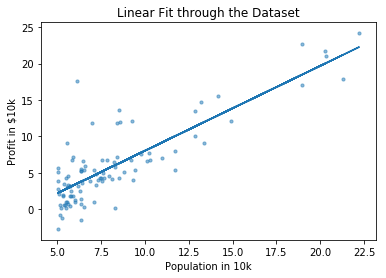

In [15]:
# Plotting the linear fit
plt.plot(X[:,1], np.dot(X, theta))
plt.scatter(X[:,1], y, s=10, alpha=0.5)
plt.title('Linear Fit through the Dataset')
plt.xlabel('Population in 10k')
plt.ylabel('Profit in $10k')
plt.show()

In [16]:
# Now let's see how our model performs on new data (Let's initialize a few random ones)
new_data_population = np.array([7.2, 18, 24, 13, 26])
new_data = new_data_population.reshape(5,1)
new_data = np.append(np.ones((5, 1), dtype=int), new_data, axis=1)

In [17]:
# Predicting the Results
predictions = np.zeros((5,1), dtype=float)
for i in range(5):
    predictions[i][0] = abs(np.dot(new_data[i][:], theta))
    print("Predicted Value of profit for ", new_data_population[i], " population (10k) : $", predictions[i][0], " (10k)")

Predicted Value of profit for  7.2  population (10k) : $ 4.767517483011831  (10k)
Predicted Value of profit for  18.0  population (10k) : $ 17.364230866636117  (10k)
Predicted Value of profit for  24.0  population (10k) : $ 24.362404968649606  (10k)
Predicted Value of profit for  13.0  population (10k) : $ 11.532419114958206  (10k)
Predicted Value of profit for  26.0  population (10k) : $ 26.69512966932077  (10k)


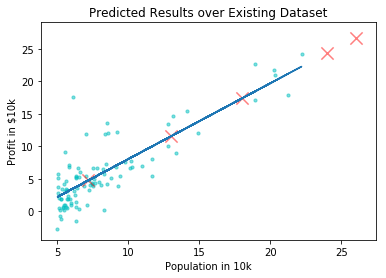

In [18]:
# Plotting the results
plt.plot(X[:,1], np.dot(X, theta))
plt.scatter(X[:,1], y, s=10, alpha=0.5, color='c')
plt.scatter(new_data_population, predictions, s=150, alpha=0.5, color='r', marker='x')
plt.title('Predicted Results over Existing Dataset')
plt.xlabel('Population in 10k')
plt.ylabel('Profit in $10k')
plt.show()

So that's it. Our univariate linear regression model works and it was able to predict the profits for some random populations. Now we can go ahead and create a similar linear regression model for datasets with multiple features, also known as **Multivariate Linear Regression**. But that's going to be another notebook soon.